In [ ]:
#######################################################   Project Discription    ##########################################


#  In this Project i have used complex SQL queries and analysis of data using pandas with graph. which will answer how 
#  the Olympics have evolved over time, including participation and performance of women, different nations , and 
#  different sports and events. The objective was to showcase my Python programming skills and proficiency in utilizing
#  relevant modules pandas, sqlalchemy and proficiency in SQL. sqlalchemy can be used to query the data available on 
#  Database. in this i have used sqlserver to query the data.


## Data Collection and Storage:-

#   i have used  historical dataset of the Olympic Games, including all the Games from 1896 to 2016.
#   I have taken this data from Kaggle to do analysis using Pandas and SQL via Jupyter. Note that the Winter and 
#   Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a
#   four year cycle starting with 1994, then Summer in 1996, then Winter in 1998 and so on.


## Data cleaning and exploration:

#   Removed any duplicate records and dropped null cell.
#   Standardized data formats and transformed data types as necessary.
#   This athlete_events dataset contains details of athlete_id, win or not, year, season and events.
#   athletes dataset contain data about each athletes their id, name,gender,  nationality, height, team.
#   in athletes dataset id is the primary key and athlete_id in athlete_events table is foreign key.


## Data Analysis:

#   Analysed and ploted a graph on  Number of Athletes Year-wise participating in olympic.
#   ploted graph on No of Nation participation Year Wise.
#   A graph which tells about No of Events year wise.
#   also a view which tells more about Male vs Female in athlete year wise.
#   apart from these i used sqlalchemy to read data from my database and query them with sql complex query in sql server.


##  Results:

#   Analyze historical Olympic data to gain insights into medal distributions, top-performing countries, and 
#   athlete demographics. 
#   leveraged the power of pandas, sqlalchemy modules and broaden my horizon of knowledge.
#   Identified countries that consistently performed well across multiple Olympic editions.
#   visualization of any significant changes in medal distributions over the years.
#   Examined gender participations in terms of medal counts and participation.
#   wrote complex query to sql server to give more insight about historical olympic data.


In [1]:
# importing relavent modules
import pandas as pd
import sqlalchemy as sal
import matplotlib.pyplot as plt


In [2]:
athlete_events=pd.read_csv('G:/SQL files/athlete_project/athlete_events.csv')
regions=pd.read_csv('G:/SQL files/athlete_project/noc_regions.csv')

In [3]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df=pd.merge(athlete_events,regions, how='inner',left_on='NOC',right_on='NOC')

In [5]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270762,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270763,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270764,122166,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
270765,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


Text(0.5, 1.0, 'Number of Athletes Year-wise ')

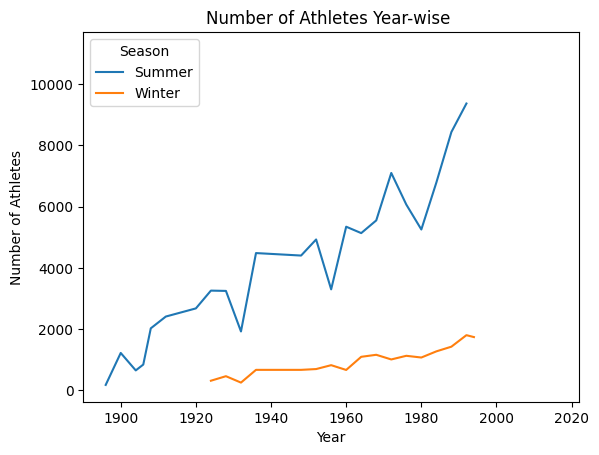

In [6]:
                    #################   Number of athletes over time     ######################
df.groupby(['Year','Season'])['Name'].nunique().unstack().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes Year-wise ')

Text(0.5, 1.0, 'No of Nation Year Wise')

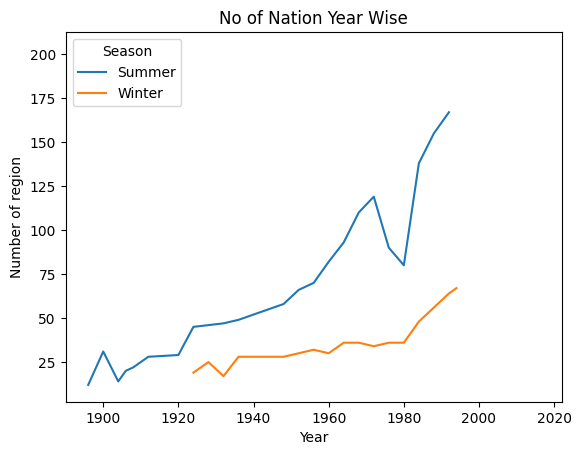

In [7]:
                                ###########     Number of Nation participation over time     #############
df.groupby(['Year','Season'])['region'].nunique().unstack().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of region')
plt.title('No of Nation Year Wise')

Text(0.5, 1.0, 'No of Events year wise')

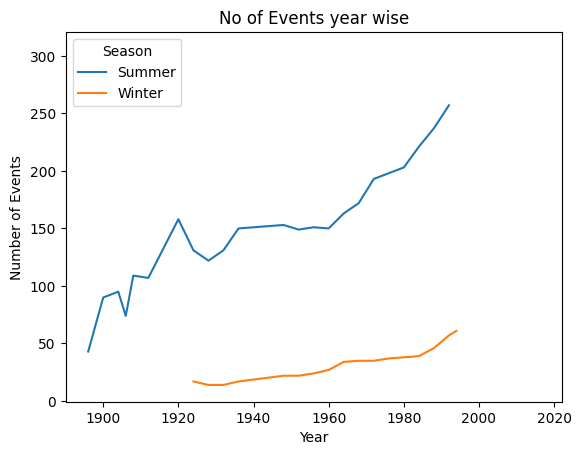

In [8]:
                                #############     Number of events organised over year     #############
df.groupby(['Year','Season'])['Event'].nunique().unstack().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('No of Events year wise')

Text(0.5, 1.0, 'Male vs Female in athlete year wise')

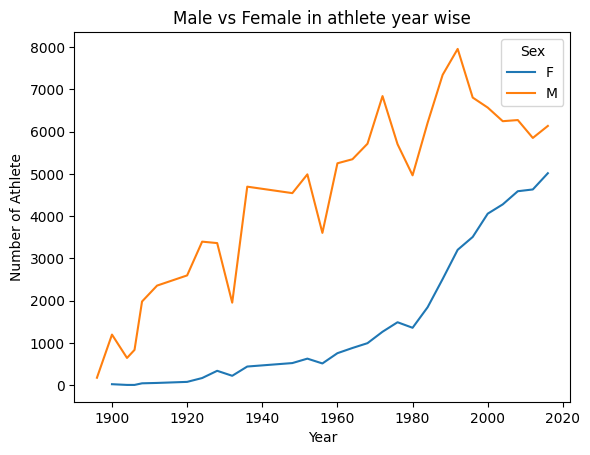

In [9]:
                                ############   Number of men vs women with time    ###########
df.groupby(['Year','Sex'])['Name'].nunique().unstack().drop(index=[1994,1998,2002,2006,2010,2014]).plot(kind='line')
#  df.groupby(['Year','Season'])['Event'].nunique().unstack().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Athlete')
plt.title('Male vs Female in athlete year wise')

In [ ]:
########     reading data from sqlserver and cleaning them to process and query them in sqlserver by using jupyter hub

In [10]:
import sqlalchemy as sal

engine = sal.create_engine('mssql://LAPTOP-FQ8O76CD\SQLEXPRESS/project?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn = engine.connect()

In [11]:
def extract():
    athletes=pd.read_sql_query('select * from athletes',engine)
    athlete_events=pd.read_sql_query('select * from athlete_events',engine)
    return athletes,athlete_events

In [12]:
athletes,athlete_events=extract()

In [13]:
athlete_events.isnull().any()

athlete_id    False
games         False
year          False
season        False
city          False
sport         False
event         False
medal         False
dtype: bool

In [14]:
athletes.isnull().any()
# there are null in height and weight column, but these wont impact our calculation and query

id        False
name      False
sex       False
height     True
weight     True
team      False
dtype: bool

In [15]:
athlete_events.drop_duplicates(inplace=True)

In [16]:
athletes.drop_duplicates(inplace=True)
# droping duplicate rows in athletes table

In [17]:
#  1.  which team has won the maximum gold medals over the years.

team=pd.read_sql_query('''select top 1 team, count(1) as no_ot_win
                          from athletes a join athlete_events ae on a.id=ae.athlete_id 
                          where medal='Gold'  group by team
                          order by no_ot_win desc''',engine)


team

,team,no_ot_win
0,United States,44


In [18]:
##  2. for each team print total silver medals and year in which they won maximum silver medal..output 3 columns
#   team,total_silver_medals, year_of_max_silver

team_won_silver= pd.read_sql_query('''
                    with cte_medal as ( select team,year,count(1) as tot_medal
                    from athletes a join athlete_events ae on a.id=ae.athlete_id
                    where medal='Silver'  group by team,year)
                    
                    select team,oved_all_medal, year from 
                    (select *,sum(tot_medal) over(partition by team) as oved_all_medal,max(tot_medal) 
                    over(partition by team) as max_medal from cte_medal) A
                    where tot_medal=max_medal''',engine)

team_won_silver

,team,oved_all_medal,year
0,Argentina,2,1996
1,Argentina,2,2000
2,Australia,4,2004
3,Austria,1,1924
4,Azerbaijan,1,1996
...,...,...,...
99,West Germany,4,1976
100,West Germany,4,1984
101,West Germany,4,1988
102,West Germany,4,1992


In [19]:
##  3. which player has won maximum gold medals  amongst the players 
#    which have won only gold medal (never won silver or bronze) over the years.

team_only_gold= pd.read_sql_query('''
                        with cte_all as (select * from athletes a join athlete_events ae on a.id=ae.athlete_id)
                        
                        select top 1 name,count(1) as no_of_medal from cte_all 
                        where athlete_id not in (select athlete_id from athlete_events where medal in ('Silver','Bronze')) 
                        and medal ='Gold'
                        group by name
                        order by no_of_medal desc ''',engine)

team_only_gold

,name,no_of_medal
0,Simon Ammann,4


In [20]:
##  4. in each year which player has won maximum gold medal . Write a query to print year,player name 
#    and no of golds won in that year . In case of a tie print comma separated player names.


player_max_gold= pd.read_sql_query('''
                        with cte_medal as (select year,name,count(1) as no_of_medal
                        from athletes a join athlete_events ae on a.id=ae.athlete_id 
                        where medal='Gold' group by year,name)
                        
                        select year,no_of_medal, string_agg(name,',') as player_name from 
                        (select *,rank() over(partition by year order by no_of_medal) as rnk from cte_medal)a
                        where rnk=1
                        group by year,no_of_medal ''',engine)


player_max_gold.head()

,year,no_of_medal,player_name
0,1896,1,Nikolaos Andriakopoulos
1,1900,1,"Louis Grenville ""Lou"" Abell,Margaret Ives Abbo..."
2,1904,1,"Louis Grenville ""Lou"" Abell"
3,1906,1,"Georgios Aliprantis,Ioannis Agrimis,Aage Jrgen..."
4,1908,1,"Edward John Amoore,Timothy Joseph ""Tim"" Ahearne"


In [21]:
##  5. in which event and year India has won its first gold medal,first silver medal and first bronze medal
#   print 3 columns medal,year,sport


India_won_medal=pd.read_sql_query('''
                    select distinct * from 
                    (select  medal,year,event,rank() over(partition by medal order by year) as rnk
                    from athlete_events ae join athletes a on a.id=ae.athlete_id
                    where team like '%India%' and medal!='NA') a
                    where rnk=1 ''',engine)


India_won_medal

,medal,year,event,rnk
0,Bronze,1904,Lacrosse Men's Lacrosse,1
1,Gold,1928,Hockey Men's Hockey,1


In [22]:
##  6 find players who won gold medal in summer and winter olympics both.

player_gold_sw= pd.read_sql_query('''
                    select name,year,count(distinct season) as times_year
                    from athlete_events ae join athletes a on a.id=ae.athlete_id
                    where medal='Gold'
                    group by name,year
                    having count(distinct season)>1''',engine)


player_gold_sw

,name,year,times_year


In [108]:
##  7 find players who won gold, silver and bronze medal in a single olympics. print player name along with year.


player_won_GSB=pd.read_sql_query('''
                    select name,year,count(distinct medal) as uni_medal,STRING_AGG(medal,',') as medals
                    from athlete_events ae join athletes a on a.id=ae.athlete_id
                    where medal <> 'NA'
                    group by name,year
                    having count(distinct medal)=3 ''',engine)

player_won_GSB

,name,year,uni_medal,medals
0,Nikolay Yefimovich Andrianov,1972,3,"Silver,Gold,Bronze"
1,Nikolay Yefimovich Andrianov,1976,3,"Gold,Silver,Gold,Gold,Silver,Gold,Bronze"
2,Nikolay Yefimovich Andrianov,1980,3,"Silver,Gold,Silver,Gold,Bronze"
3,Peter Angerer,1984,3,"Silver,Gold,Bronze"
4,Simona Amnar (-Tabr),1996,3,"Bronze,Bronze,Silver,Gold"


In [23]:
##  8. find players who have won gold medals in consecutive 3 summer olympics in the same event . 
#    Consider only olympics 2000 onwards. Assume summer olympics happens every 4 year starting 2000.print player name.


players=pd.read_sql_query('''
             with cte_1 as (select name,event,year from athlete_events ae join athletes a on a.id=ae.athlete_id
             where year>=2000 and season='Summer' and medal='Gold')
             
             ,cte_con as (select name,year,1 as medals from cte_1 group by name,year )
             
             select a.name from (select *,sum(medals) over(partition by name order by year) as tot_medal
             from cte_con) a 
             where tot_medal=3 ''',engine)


players

,name
0,"Charles Benedict ""Ben"" Ainslie"
1,Nathan Ghar-Jun Adrian
